In [1]:
# Imports 
!pip install keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [2]:
# The Model
input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4,4,16) i.e. 256-dimensional
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding = 'same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
#adam = optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#sgd = optimizers.SGD(lr=0.001, decay=1e-4, momentum=0.8, nesterov=True)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!ls "/content/gdrive/My Drive/Chexnet"


image_data.npy	train_v2.csv  Untitled0.ipynb  Untitled.ipynb


In [6]:
data = np.load('/content/gdrive/My Drive/Chexnet/image_data.npy')
print(data.shape)

(26684, 4096)


In [0]:
#df = pd.read_csv('train_v2.csv')

In [0]:
x_train = data[:21000,:]
x_validation = data[21000:,:]

In [9]:
print(x_train.shape)
print(x_validation.shape)

(21000, 4096)
(5684, 4096)


In [0]:
x_train = x_train.astype('float32') / 255.
x_validation = x_validation.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))  # adapt this if using `channels_first` image data format
x_validation = np.reshape(x_validation, (len(x_validation), 64, 64, 1))  # adapt this if using `channels_first` image data format

In [12]:
from keras.callbacks import TensorBoard
epochs = 125
batch_size = 128
autoencoder_train = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,verbose = 1,
                validation_data=(x_validation, x_validation))


Train on 21000 samples, validate on 5684 samples
Epoch 1/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0070 - val_loss: 0.0072
Epoch 2/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 3/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 4/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 5/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 6/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 7/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 8/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 9/125
21000/21000 [==============================] - 31s 1ms/step - loss: 0.0063 - val_loss: 0.00

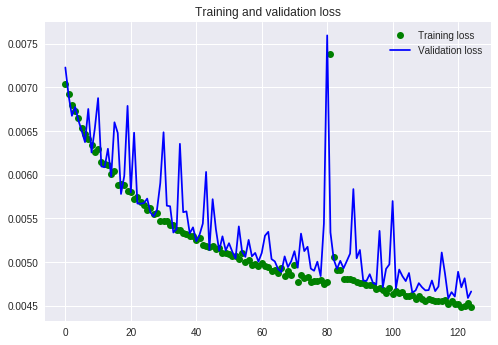

In [13]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(125)
plt.figure()
plt.plot(epochs, loss, 'go --', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

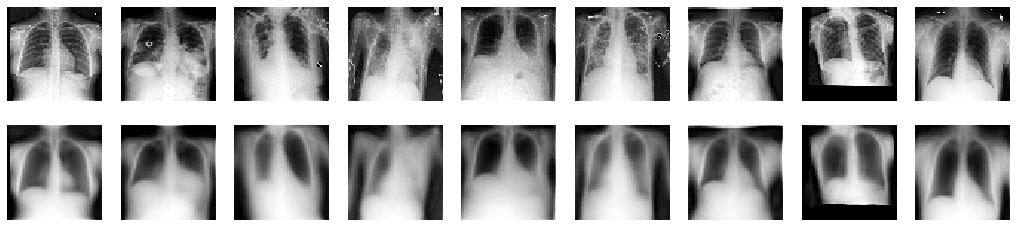

In [14]:
decoded_imgs = autoencoder.predict(x_validation)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_validation[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
encoder = Model(input_img, encoded)
encoded_values_train = encoder.predict(x_train)
encoded_values_test = encoder.predict(x_validation)

In [16]:
print(np.shape(encoded_values_train))
print(np.shape(encoded_values_test))

(21000, 4, 4, 16)
(5684, 4, 4, 16)


In [17]:
encoded_values_train = encoded_values_train.reshape(21000,256)
print(np.shape(encoded_values_train))
encoded_values_test = encoded_values_test.reshape(5684,256)
print(np.shape(encoded_values_test))

(21000, 256)
(5684, 256)


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Chexnet/train_v2.csv')

In [0]:
labels_train = df['Target'][:21000]
labels_test = df['Target'][21000:]

In [20]:
# Log-Reg for Classification
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(encoded_values_train,labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
labels_predict_test = clf.predict(encoded_values_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, labels_predict_test, normalize=True))

0.8212526389866291


In [22]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(encoded_values_train, labels_train) 
labels_predict_test = clf.predict(encoded_values_test)

print(accuracy_score(labels_test, labels_predict_test, normalize=True))

0.8194933145672062
